# Prediction using Supervised ML

# Simple Linear Regression

## Predict the percentage of an student based on the no. of study hours.


# TASK 1

### The task is about **linear regression** and have to predict the score of the student if the student sleeps for certain hours per day.

In [7]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# import model
from sklearn.linear_model import LinearRegression


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# retrieving data from url 
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [19]:
# printing first five entries
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [20]:
# the rows and columns of the data
data.shape

(25, 2)

In [21]:
# statistical information of the dataset 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [43]:
# knowing the dtype and if there is missing info in any column
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# plotting the distplot to skewness if inside data to know the density of the people tending to share 
# similar sleeping hours and scores

In [23]:


f = plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

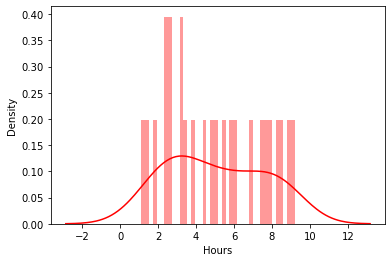

In [24]:
ax = f.add_subplot(121)
sns.distplot(data['Hours'], bins=40, color='r')

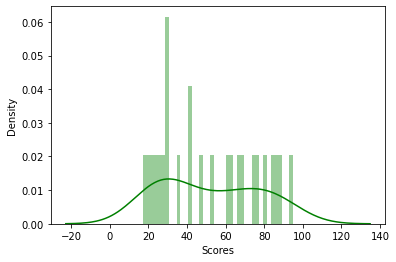

In [26]:
ax = f.add_subplot(122)
sns.distplot(data['Scores'], bins=40, color='g')


In [27]:

data.groupby('Hours').agg(['mean','min','max'])['Scores']

,mean,min,max
Hours,,,
1.1,17.0,17,17
1.5,20.0,20,20
1.9,24.0,24,24
2.5,25.5,21,30
2.7,27.5,25,30
3.2,27.0,27,27
3.3,42.0,42,42
3.5,30.0,30,30
3.8,35.0,35,35


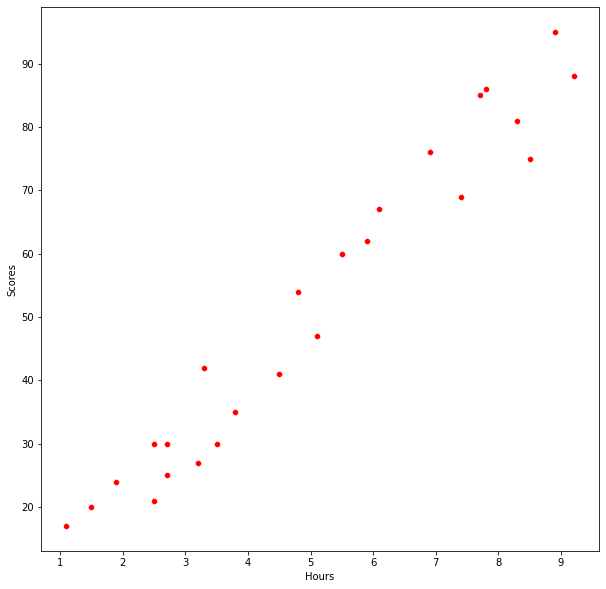

In [28]:

# scatterplot of the data points of our dataset 
f = plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='Hours', y='Scores', data=data, palette='magma', color='red')


In [29]:

# initialising the linear regression model
lr = LinearRegression()

In [30]:
# data locating for the model
X = data.iloc[:,0].values.reshape(-1,1)
y= data['Scores']



In [31]:

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [32]:

print(X_train.shape,X_test.shape)

(17, 1) (8, 1)


In [33]:
# fitting the data to train the model
lr.fit(X_train,y_train)


LinearRegression()

In [34]:
# predicting the test data
predicted = lr.predict(X_test)
predicted


array([19.53386812, 93.33875612, 11.44566122, 25.6000233 , 15.48976467,
       35.71028193, 27.62207503, 79.18439404])

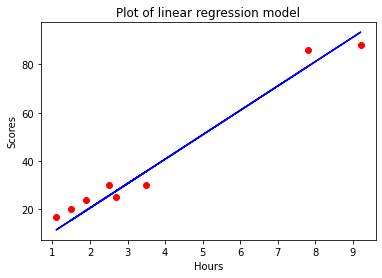

In [38]:
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, predicted, color='b')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Plot of linear regression model')
plt.show()

### To predict if how much score the student gets if he/she sleeps for 9.5 hours

In [51]:
print(lr.predict([[9.5]]))

[96.37183371]


In [37]:

# coefficients and Intercept
print("Coefficient:",lr.coef_)
print("Intercept", lr.intercept_)

print("Mean Squared Error:",mean_squared_error(y_test, predicted))

print("R2 score:",r2_score(y_test, predicted))


Coefficient: [10.11025863]
Intercept 0.324376726691753
Mean Squared Error: 25.617053702361062
R2 score: 0.9660138591013452


## Thankyou Very much 